# Lesson 2: NumPy and Pandas for 1D Data

## 1D Data in NumPy and Pandas

In [1]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

daily_engagement = read_csv('daily_engagement_full.csv')

In [2]:
from sets import Set

def make_set_unique_values(table, key_name):
    values_set = Set([])
    for row in table:
        values_set.add(row[key_name])
    return values_set

unique_engagement_students_set = make_set_unique_values(daily_engagement, 'acct')
len(unique_engagement_students_set)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: the sets module is deprecated
  if __name__ == '__main__':


1237

In [3]:
# All this is faster using Pandas

import gzip
import pandas as pd

In [4]:
# Pandas has built in function 'read_csv'

with gzip.open('daily_engagement_full.csv.gz') as csv_file:
    daily_engagement = pd.read_csv(csv_file)

In [5]:
# Pandas has built in function 'unique'

len(daily_engagement['acct'].unique())

1237

## Numpy Arrays

In [6]:
import numpy as np

# First 20 countries with employment data
countries = np.array([
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina'
])

# Employment data in 2007 for those 20 countries
employment = np.array([
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
])

In [7]:
# Accessing elements

print countries[0]
print countries[3]

Afghanistan
Angola


In [8]:
# Slicing

print countries[0:3],
print countries[:3],
print countries[17:],
print countries[:]

['Afghanistan' 'Albania' 'Algeria'] ['Afghanistan' 'Albania' 'Algeria'] ['Bhutan' 'Bolivia' 'Bosnia and Herzegovina'] ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina']


In [9]:
# Element types

print countries.dtype,
print employment.dtype,
print np.array([0, 1, 2, 3]).dtype,
print np.array([1.0, 1.5, 2.0, 2.5]).dtype,
print np.array([True, False, True]).dtype,
print np.array(['AL', 'AK', 'AZ', 'AR', 'CA']).dtype

|S22 float64 int64 float64 bool |S2


In [10]:
# Looping

for country in countries:
    print 'Examining country {}'.format(country)

print '\n'

for i in range(len(countries)):
    country = countries[i]
    country_employment = employment[i]
    print 'Country {} has employment {}'.format(country, country_employment)

Examining country Afghanistan
Examining country Albania
Examining country Algeria
Examining country Angola
Examining country Argentina
Examining country Armenia
Examining country Australia
Examining country Austria
Examining country Azerbaijan
Examining country Bahamas
Examining country Bahrain
Examining country Bangladesh
Examining country Barbados
Examining country Belarus
Examining country Belgium
Examining country Belize
Examining country Benin
Examining country Bhutan
Examining country Bolivia
Examining country Bosnia and Herzegovina


Country Afghanistan has employment 55.70000076
Country Albania has employment 51.40000153
Country Algeria has employment 50.5
Country Angola has employment 75.69999695
Country Argentina has employment 58.40000153
Country Armenia has employment 40.09999847
Country Australia has employment 61.5
Country Austria has employment 57.09999847
Country Azerbaijan has employment 60.90000153
Country Bahamas has employment 66.59999847
Country Bahrain has employm

In [11]:
# Numpy functions

print employment.mean()
print employment.std()
print employment.max()
print employment.sum()

58.6850000385
9.33826911369
75.69999695
1173.70000077


In [12]:
def max_employment(countries, employment):
    '''
    Fill in this function to return the name of the country
    with the highest employment in the given employment
    data, and the employment in that country.
    '''
    max_value = 0
    for i in range(len(countries)):
        if employment[i] > max_value:
            max_value = employment[i]
            max_country = countries[i]
    return (max_country, max_value)

max_employment(countries, employment)

('Angola', 75.699996949999999)

In [13]:
# Using NumPy function:

def max_employment2(countries, employment):
    i = employment.arg_max()
    return (max_country[i], max_value[i])

max_employment(countries, employment)

('Angola', 75.699996949999999)

## Calculate Overall Completion Rate

In [14]:
# Arithmetic operations between 2 NumPy arrays

a = np.array([1, 2, 3, 4])
b = np.array([1, 2, 1, 2])
    
print a + b
print a - b
print a * b
print a / b
print a ** b

[2 4 4 6]
[0 0 2 2]
[1 4 3 8]
[1 1 3 2]
[ 1  4  3 16]


In [15]:
# Arithmetic operations between a NumPy array and a single number

a = np.array([1, 2, 3, 4])
b = 2

print a + b
print a - b
print a * b
print a / b
print a ** b

[3 4 5 6]
[-1  0  1  2]
[2 4 6 8]
[0 1 1 2]
[ 1  4  9 16]


In [16]:
# Logical operations with NumPy arrays

a = np.array([True, True, False, False])
b = np.array([True, False, True, False])

print a & b
print a | b
print ~a

print a & True
print a & False

print a | True
print a | False

[ True False False False]
[ True  True  True False]
[False False  True  True]
[ True  True False False]
[False False False False]
[ True  True  True  True]
[ True  True False False]


In [17]:
# Comparison operations between 2 NumPy Arrays

a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])

print a > b
print a >= b
print a < b
print a <= b
print a == b
print a != b

[False False False  True  True]
[False False  True  True  True]
[ True  True False False False]
[ True  True  True False False]
[False False  True False False]
[ True  True False  True  True]


In [18]:
# Comparison operations between a NumPy array and a single number

a = np.array([1, 2, 3, 4])
b = 2

print a > b
print a >= b
print a < b
print a <= b
print a == b
print a != b

[False False  True  True]
[False  True  True  True]
[ True False False False]
[ True  True False False]
[False  True False False]
[ True False  True  True]


In [19]:
# First 20 countries with school completion data
countries = np.array([
       'Algeria', 'Argentina', 'Armenia', 'Aruba', 'Austria','Azerbaijan',
       'Bahamas', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bolivia',
       'Botswana', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Cape Verde'
])

In [20]:
# Female school completion rate in 2007 for those 20 countries
female_completion = np.array([
    97.35583,  104.62379,  103.02998,   95.14321,  103.69019,
    98.49185,  100.88828,   95.43974,   92.11484,   91.54804,
    95.98029,   98.22902,   96.12179,  119.28105,   97.84627,
    29.07386,   38.41644,   90.70509,   51.7478 ,   95.45072
])

In [21]:
# Male school completion rate in 2007 for those 20 countries
male_completion = np.array([
     95.47622,  100.66476,   99.7926 ,   91.48936,  103.22096,
     97.80458,  103.81398,   88.11736,   93.55611,   87.76347,
    102.45714,   98.73953,   92.22388,  115.3892 ,   98.70502,
     37.00692,   45.39401,   91.22084,   62.42028,   90.66958
])

In [22]:
def overall_completion_rate(female_completion, male_completion):
    '''
    Fill in this function to return a NumPy array containing the overall
    school completion rate for each country. The arguments are NumPy
    arrays giving the female and male completion of each country in
    the same order.
    '''
    return (female_completion + male_completion)/2.0

overall_completion_rate(female_completion, male_completion)

array([  96.416025,  102.644275,  101.41129 ,   93.316285,  103.455575,
         98.148215,  102.35113 ,   91.77855 ,   92.835475,   89.655755,
         99.218715,   98.484275,   94.172835,  117.335125,   98.275645,
         33.04039 ,   41.905225,   90.962965,   57.08404 ,   93.06015 ])

## Standarsising Data

In [23]:
# First 20 countries with employment data
countries = np.array([
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina'
])

# Employment data in 2007 for those 20 countries
employment = np.array([
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
])

In [24]:
# Change this country name to change what country will be printed when you
# click "Test Run". Your function will be called to determine the standardized
# score for this country for each of the given 5 Gapminder variables in 2007.
# The possible country names are available in the Downloadables section.

country_name = 'United States'

def standardize_data(values):
    '''
    Fill in this function to return a standardized version of the given values,
    which will be in a NumPy array. Each value should be translated into the
    number of standard deviations that value is away from the mean of the data.
    (A positive number indicates a value higher than the mean, and a negative
    number indicates a value lower than the mean.)
    '''
    return (values - values.mean())/values.std()

standardize_data(employment)

array([-0.31965231, -0.780123  , -0.87650077,  1.82207181, -0.03051941,
       -1.99019768,  0.30144772, -0.16973184,  0.23719615,  0.84758731,
        0.18365304,  1.00821665,  0.87971351, -0.56595055, -1.07996476,
       -0.20185762,  1.38301845, -0.03051941,  1.2545153 , -1.87240259])

## NumPy Index Arrays

In [25]:
# Using index arrays

a = np.array([1, 2, 3, 4])
b = np.array([True, True, False, False])

print a[b]
print a[np.array([True, False, True, False])]

[1 2]
[1 3]


In [26]:
# Creating the index array using vectorized operations

a = np.array([1, 2, 3, 2, 1])
b = (a >= 2)

print b
print a[b]
print a[a >= 2]

[False  True  True  True False]
[2 3 2]
[2 3 2]


In [27]:
# Creating the index array using vectorized operations on another array

a = np.array([1, 2, 3, 4, 5])
b = np.array([1, 2, 3, 2, 1])

print b == 2
print a[b == 2]

[False  True False  True False]
[2 4]


In [28]:
# Time spent in the classroom in the first week for 20 students
time_spent = np.array([
       12.89697233,    0.        ,   64.55043217,    0.        ,
       24.2315615 ,   39.991625  ,    0.        ,    0.        ,
      147.20683783,    0.        ,    0.        ,    0.        ,
       45.18261617,  157.60454283,  133.2434615 ,   52.85000767,
        0.        ,   54.9204785 ,   26.78142417,    0.
])

In [29]:
# Days to cancel for 20 students
days_to_cancel = np.array([
      4,   5,  37,   3,  12,   4,  35,  38,   5,  37,   3,   3,  68,
     38,  98,   2, 249,   2, 127,  35
])

In [30]:
def mean_time_for_paid_students(time_spent, days_to_cancel):
    '''
    Fill in this function to calculate the mean time spent in the classroom
    for students who stayed enrolled at least (greater than or equal to) 7 days.
    Unlike in Lesson 1, you can assume that days_to_cancel will contain only
    integers (there are no students who have not canceled yet).
    
    The arguments are NumPy arrays. time_spent contains the amount of time spent
    in the classroom for each student, and days_to_cancel contains the number
    of days until each student cancel. The data is given in the same order
    in both arrays.
    '''
    return time_spent[days_to_cancel>=7].mean()

mean_time_for_paid_students(time_spent, days_to_cancel)

41.054003485454537

## + vs +=

In [31]:
a = np.array([1, 2, 3, 4])
b = a
a += np.array([1, 1, 1, 1])
b

array([2, 3, 4, 5])

In [32]:
a = np.array([1, 2, 3, 4])
b = a
a = a + np.array([1, 1, 1, 1])
b

array([1, 2, 3, 4])

## In Place vs. Not In Place

In [33]:
a = np.array([1, 2, 3, 4, 5])
slice = a[:3]
slice[0]=100
a

array([100,   2,   3,   4,   5])

## Pandas Series

In [34]:
countries = ['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
             'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
             'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
             'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia']

life_expectancy_values = [74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
                          70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
                          67.3,  70.6]

gdp_values = [ 1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
              13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
              27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
                483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
               3680.91642923,    366.04496652,   1175.92638695,   1132.21387981]

# Life expectancy and gdp data in 2007 for 20 countries
life_expectancy = pd.Series(life_expectancy_values)
gdp = pd.Series(gdp_values)

In [35]:
# Accessing elements and slicing

#print life_expectancy
print life_expectancy[0]
print gdp[3:6]

74.7
3      562.987685
4    13495.127466
5     9388.688523
dtype: float64


In [36]:
# Looping

for country_life_expectancy in life_expectancy:
    print 'Examining life expectancy {}'.format(country_life_expectancy)

Examining life expectancy 74.7
Examining life expectancy 75.0
Examining life expectancy 83.4
Examining life expectancy 57.6
Examining life expectancy 74.6
Examining life expectancy 75.4
Examining life expectancy 72.3
Examining life expectancy 81.5
Examining life expectancy 80.2
Examining life expectancy 70.3
Examining life expectancy 72.1
Examining life expectancy 76.4
Examining life expectancy 68.1
Examining life expectancy 75.2
Examining life expectancy 69.8
Examining life expectancy 79.4
Examining life expectancy 70.8
Examining life expectancy 62.7
Examining life expectancy 67.3
Examining life expectancy 70.6


In [37]:
# Pandas functions

print life_expectancy.mean()
print life_expectancy.std()
print gdp.max()
print gdp.sum()

72.87
6.21399947487
27036.4873319
182957.59833


In [38]:
# Vectorized operations and index arrays

a = pd.Series([1, 2, 3, 4])
b = pd.Series([1, 2, 1, 2])

print a + b, '\n'
print a * 2, '\n'
print a >= 3, '\n'
print a[a >= 3]

0    2
1    4
2    4
3    6
dtype: int64 

0    2
1    4
2    6
3    8
dtype: int64 

0    False
1    False
2     True
3     True
dtype: bool 

2    3
3    4
dtype: int64


In [39]:
def variable_correlation(variable1, variable2):
    '''
    Fill in this function to calculate the number of data points for which
    the directions of variable1 and variable2 relative to the mean are the
    same, and the number of data points for which they are different.
    Direction here means whether each value is above or below its mean.
    
    You can classify cases where the value is equal to the mean for one or
    both variables however you like.
    
    Each argument will be a Pandas series.
    
    For example, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([4, 5, 6, 7]), then the output would be (4, 0).
    This is because 1 and 4 are both below their means, 2 and 5 are both
    below, 3 and 6 are both above, and 3 and 4 are both above.
    
    On the other hand, if the inputs were pd.Series([1, 2, 3, 4]) and
    pd.Series([7, 6, 5, 4]), then the output would be (0, 4).
    This is because 1 is below its mean but 7 is above its mean, and
    so on.
    '''
    
    both_above = (variable1 > variable1.mean()) & (variable2 > variable2.mean())
    both_below = (variable1 < variable1.mean()) & (variable2 < variable2.mean())

    num_same_direction = (both_above | both_below).sum()
    num_different_direction = len(variable1) - num_same_direction
    
    return (num_same_direction, num_different_direction)

variable_correlation(life_expectancy, gdp)

(17, 3)

## Series Indices

In [40]:
# NumPy arrays are like souped up Python lists
a = np.array([1, 2, 3, 4])

# Pandas series are like a cross between Python list and dict
s = pd.Series([1, 2, 3, 4])

s.describe()

count    4.000000
mean     2.500000
std      1.290994
min      1.000000
25%      1.750000
50%      2.500000
75%      3.250000
max      4.000000
dtype: float64

In [41]:
countries = ['Afghanistan', 'Albania', 'Algeria', 'Angola']

employment_values = [55.70000076, 51.40000153, 50.5 , 75.69999695]

# Employment data in 2007 for 20 countries
employment = pd.Series(employment_values, index=countries)

print employment, '\n'

print employment[0]
print employment.iloc[0]
print employment['Albania']
print employment.loc['Albania']

employment.argmax()

Afghanistan    55.700001
Albania        51.400002
Algeria        50.500000
Angola         75.699997
dtype: float64 

55.70000076
55.70000076
51.40000153
51.40000153


'Angola'

In [42]:
countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
    'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
    'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
    'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina'
]

employment_values = [
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076
]

# Employment data in 2007 for 20 countries
employment = pd.Series(employment_values, index=countries)

In [43]:
def max_employment(employment):
    '''
    Fill in this function to return the name of the country
    with the highest employment in the given employment
    data, and the employment in that country.
    
    The input will be a Pandas series where the values
    are employment and the index is country names.
    
    Try using the Pandas argmax() function. Documention is
    here: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.argmax.html
    '''
    max_country = employment.argmax()
    max_value = employment[employment.argmax()]

    return (max_country, max_value)

max_employment(employment)

('Angola', 75.699996949999999)

## Vectorised Operations and Series Indices

In [44]:
# Addition when indexes are the same

s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
print s1 + s2

a    11
b    22
c    33
d    44
dtype: int64


In [45]:
# Indexes have same elements in a different order

s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['b', 'd', 'a', 'c'])
print s1 + s2

a    31
b    12
c    43
d    24
dtype: int64


In [46]:
# Indexes overlap, but do not have exactly the same elements

s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
print s1 + s2

a   NaN
b   NaN
c    13
d    24
e   NaN
f   NaN
dtype: float64


In [47]:
# Indexes do not overlap

s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['e', 'f', 'g', 'h'])
print s1 + s2

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
f   NaN
g   NaN
h   NaN
dtype: float64


## Filling Missing Values

In [48]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
(s1 + s2).dropna()

c    13
d    24
dtype: float64

In [49]:
s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])

# Try to write code that will add the 2 previous series together,
# but treating missing values from either series as 0. The result
# when printed out should be similar to the following line:
# print pd.Series([1, 2, 13, 24, 30, 40], index=['a', 'b', 'c', 'd', 'e', 'f'])

index_union = sorted(Set(s1.keys()|s2.keys()))
new_s1 = s1.reindex(index_union, fill_value=0)
new_s2 = s2.reindex(index_union, fill_value=0)
new_s1 + new_s2

a     1
b     2
c    13
d    24
e    30
f    40
dtype: int64

In [50]:
s1.add(s2,fill_value=0)

a     1
b     2
c    13
d    24
e    30
f    40
dtype: float64

## Pandas Series apply()

In [51]:
s = pd.Series([1, 2, 3, 4, 5])
def add_one(x):
    return x + 1
print s
print s.apply(add_one)

0    1
1    2
2    3
3    4
4    5
dtype: int64
0    2
1    3
2    4
3    5
4    6
dtype: int64


In [52]:
names = pd.Series([
    'Andre Agassi',
    'Barry Bonds',
    'Christopher Columbus',
    'Daniel Defoe',
    'Emilio Estevez',
    'Fred Flintstone',
    'Greta Garbo',
    'Humbert Humbert',
    'Ivan Ilych',
    'James Joyce',
    'Keira Knightley',
    'Lois Lane',
    'Mike Myers',
    'Nick Nolte',
    'Ozzy Osbourne',
    'Pablo Picasso',
    'Quirinus Quirrell',
    'Rachael Ray',
    'Susan Sarandon',
    'Tina Turner',
    'Ugueth Urbina',
    'Vince Vaughn',
    'Woodrow Wilson',
    'Yoji Yamada',
    'Zinedine Zidane'
])

In [53]:
def split_reverse_and_join(s):
    new_s = s.split(' ')
    new_s.reverse()
    new_s = (', ').join(new_s)
    return new_s

print split_reverse_and_join('Andre Agassi')

Agassi, Andre


In [54]:
def reverse_names(names):
    '''
    Fill in this function to return a new series where each name
    in the input series has been transformed from the format
    "Firstname Lastname" to "Lastname, FirstName".
    
    Try to use the Pandas apply() function rather than a loop.
    '''
    return names.apply(split_reverse_and_join)
reverse_names(names)

0             Agassi, Andre
1              Bonds, Barry
2     Columbus, Christopher
3             Defoe, Daniel
4           Estevez, Emilio
5          Flintstone, Fred
6              Garbo, Greta
7          Humbert, Humbert
8               Ilych, Ivan
9              Joyce, James
10         Knightley, Keira
11               Lane, Lois
12              Myers, Mike
13              Nolte, Nick
14           Osbourne, Ozzy
15           Picasso, Pablo
16       Quirrell, Quirinus
17             Ray, Rachael
18          Sarandon, Susan
19             Turner, Tina
20           Urbina, Ugueth
21            Vaughn, Vince
22          Wilson, Woodrow
23             Yamada, Yoji
24         Zidane, Zinedine
dtype: object

## Plotting in Pandas

Populating the interactive namespace from numpy and matplotlib


(array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 array([ 1.        ,  1.88888889,  2.77777778,  3.66666667,  4.55555556,
         5.44444444,  6.33333333,  7.22222222,  8.11111111,  9.        ]),
 <a list of 9 Patch objects>)

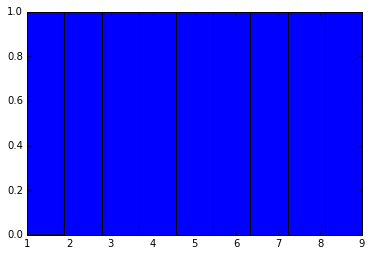

In [55]:
# If the variable data is a NumPy array or a Pandas Series, just like if it is a list,
# data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
data = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9])

# the following code will create a histogram of the data.
import matplotlib.pyplot as plt
%pylab inline
plt.hist(data, bins=9)

# Pandas also has built-in plotting that uses matplotlib behind the scenes, so if data is a Series,
# you can create a histogram using data.hist()

# There's no difference between these two in this case, but sometimes the Pandas wrapper can be
# more convenient. For example, you can make a line plot of a series using data.plot(). The index
# of the Series will be used for the x-axis and the values for the y-axis.

In [56]:
import seaborn as sns

# The following code reads all the Gapminder data into Pandas DataFrames. You'll
# learn about DataFrames next lesson.

employment = pd.read_csv('employment_above_15.csv', index_col='Country')
female_completion = pd.read_csv('female_completion_rate.csv', index_col='Country')
male_completion = pd.read_csv('male_completion_rate.csv', index_col='Country')
life_expectancy = pd.read_csv('life_expectancy.csv', index_col='Country')
gdp = pd.read_csv('gdp_per_capita.csv', index_col='Country')

# The following code creates a Pandas Series for each variable for the United States.
# You can change the string 'United States' to a country of your choice.

employment_us = employment.loc['United States']
female_completion_us = female_completion.loc['United States']
male_completion_us = male_completion.loc['United States']
life_expectancy_us = life_expectancy.loc['United States']
gdp_us = gdp.loc['United States']

# Uncomment the following line of code to see the available country names
print employment.index.values

# Use the Series defined above to create a plot of each variable over time for
# the country of your choice. You will only be able to display one plot at a time
# with each "Test Run".

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Rep.' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo, Rep.' 'Congo, Dem. Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Cyprus' 'Czech Rep.' 'Denmark' 'Dominican Rep.' 'Timor-Leste'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guadeloupe' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hong Kong, China' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Korea, Dem. Rep.' 'Korea, Rep.' 'Kuwait'
 'Kyrgyzstan

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


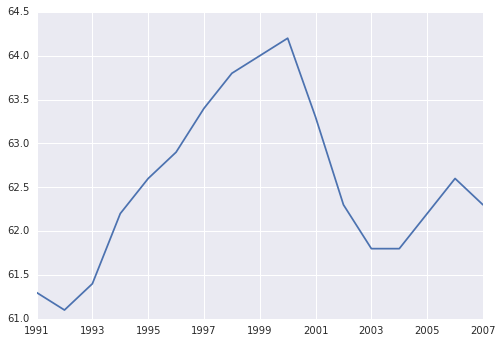

In [57]:
employment_us.plot()

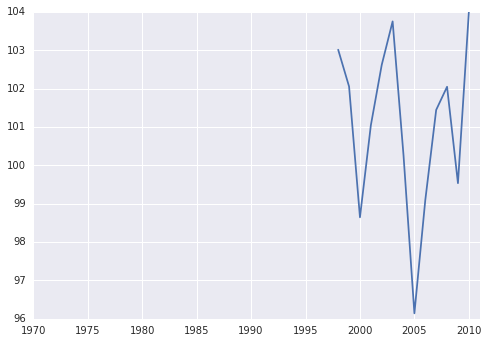

In [58]:
female_completion_us.plot()

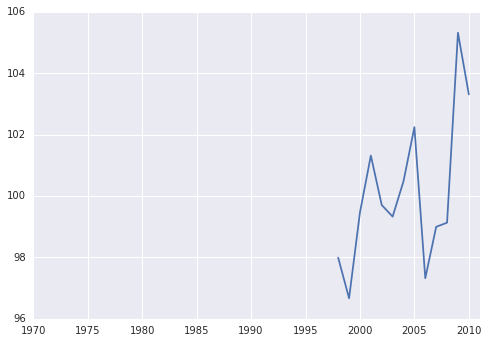

In [59]:
male_completion_us.plot()

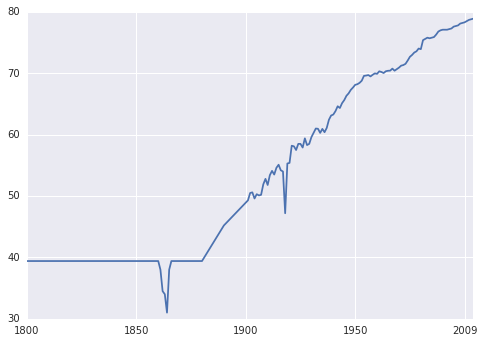

In [60]:
life_expectancy_us.plot()

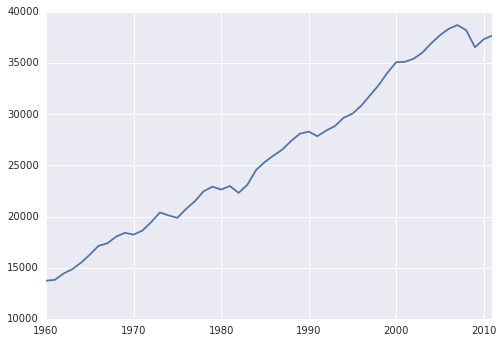

In [61]:
gdp_us.plot()